In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

start = 34500000 # (9 +(35/60))hrs*3600 seconds * 1000milliseconds/second == 9:35 AM -- 5 minutes after market open
end = 55800000 # 3:30 PM -- 30 minutes prior to market close
dtypes = {'Time':str,'Bid Price':np.float32, 'Bid Size':np.float32, 'Ask Price':np.float32,
       'Ask Size':np.float32, 'Mid':np.float32, 'dM':np.float32, 'dM_20ma':np.float32,
        'signal':np.float32, 'B eq ind':np.bool_, 'B > ind':np.bool_,
       'A eq ind':np.bool_, 'A < ind':np.bool_, 'dVB':np.float32, 'dVA':np.float32, 'OI':np.float32,
        'OI_a1':np.float32, 'OI_a2':np.float32, 'OI_a3':np.float32,'OI_a4':np.float32,
        'OI_a5':np.float32, 'OI_5ma':np.float32, 'OI_10ma':np.float32,
        'OI_20ma':np.float32, 'M_20ma':np.float32, 'M_20fma':np.float32,
       'M_10fma':np.float32, 'signal2':np.float32, 'OI Ratio':np.float32}

# Data Preparation

In [3]:
###################### ONLY RUN ONCE ###########################
fname = 'ESM2019f.csv'
DF = pd.read_csv(fname, dtype = dtypes,index_col=0)
DF.loc[:,'Time'] = DF.loc[:,'Time'].replace(np.nan,'',regex=True)
###################### ONLY RUN ONCE ###########################

D:\Programs\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Exploration

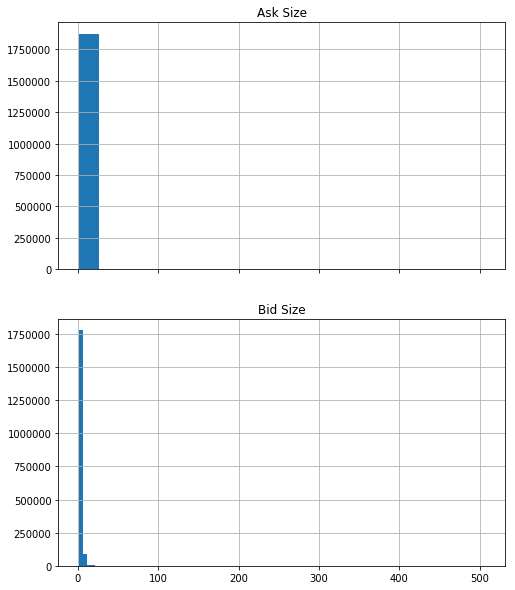

In [4]:
fig,ax = plt.subplots(2,1, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(8)
ax[0].set_title("Ask Size")
ax[1].set_title("Bid Size")
DF['Ask Size'].hist(bins=20, ax=ax[0])
DF['Bid Size'].hist(bins=20, ax=ax[1])
plt.show()

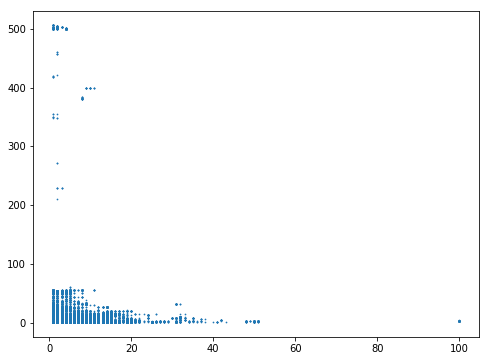

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(DF['Bid Size'], DF['Ask Size'], s = 0.5)
plt.show()

In [6]:
DF[['Bid Size','Ask Size']].corr()

,Bid Size,Ask Size
Bid Size,1.000000,0.072139
Ask Size,0.072139,1.000000


In [7]:
DF[['OI', 'dM']].corr()
# want to have positive correlation for the strategy to work
# but now we only care about classification

,OI,dM
OI,1.000000,0.370183
dM,0.370183,1.000000


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
xt = DF['OI'].dropna().values.reshape(-1,1)
yt = DF['dM'].dropna().values
lm = LinearRegression().fit(xt,yt)

r2_score(yt,lm.predict(xt))

0.13703548196873983

In [10]:
DF[DF['Date'] =='01/02/2019']['signal'].value_counts()/DF[DF['Date'] =='01/02/2019']['signal'].value_counts().sum()

 0.0    0.616582
 1.0    0.195653
-1.0    0.187766
Name: signal, dtype: float64

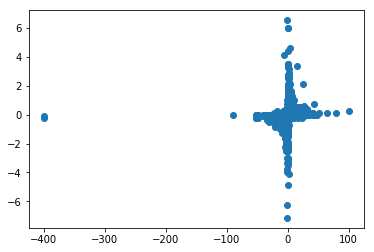

In [35]:
plt.scatter(DF[['OI','dM']].dropna().values[:,0],
           DF[['OI','dM']].dropna().values[:,1])
plt.show()

In [40]:
df = DF[['OI','Bid Price','Bid Size','Ask Size','Ask Price','Mid']]
DF.iloc[:,:-12].head()

,Date,msecs,Time,Bid Price,Bid Size,Ask Price,Ask Size,Mid,dM,dM_20ma,signal,B eq ind,B > ind,A eq ind,A < ind,dVB,dVA,OI,OI_a1
0,01/02/2019,34500000.0,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,False,False,False,NaN,NaN,NaN,NaN
1,01/02/2019,34500500.0,09:35:00.355,2486.5,2.0,2487.25,2.0,2486.875,NaN,0.0,0.0,False,False,False,False,NaN,NaN,NaN,NaN
2,01/02/2019,34501000.0,,2486.5,2.0,2487.25,2.0,2486.875,0.000,0.0,0.0,True,False,True,False,0.0,0.0,0.0,NaN
3,01/02/2019,34501500.0,,2486.5,2.0,2487.25,2.0,2486.875,0.000,0.0,0.0,True,False,True,False,0.0,0.0,0.0,0.0
4,01/02/2019,34502000.0,09:35:02.223,2486.5,1.0,2487.00,1.0,2486.750,-0.125,0.0,0.0,True,False,False,True,-1.0,1.0,-2.0,0.0


# Experimenting with SVM

In [11]:
np.unique(DF['Date'])

array(['01/02/2019', '01/03/2019', '01/04/2019', '01/06/2019',
       '01/07/2019', '01/08/2019', '01/09/2019', '01/10/2019',
       '01/11/2019', '01/13/2019', '01/14/2019', '01/15/2019',
       '01/16/2019', '01/17/2019', '01/18/2019', '01/20/2019',
       '01/21/2019', '01/22/2019', '01/23/2019', '01/24/2019',
       '01/25/2019', '01/27/2019', '01/28/2019', '01/29/2019',
       '01/30/2019', '01/31/2019', '02/01/2019', '02/03/2019',
       '02/04/2019', '02/05/2019', '02/06/2019', '02/07/2019',
       '02/08/2019', '02/10/2019', '02/11/2019', '02/12/2019',
       '02/13/2019', '02/14/2019', '02/15/2019', '02/17/2019',
       '02/18/2019', '02/19/2019', '02/20/2019', '02/21/2019',
       '02/22/2019', '02/24/2019', '02/25/2019', '02/26/2019',
       '02/27/2019', '02/28/2019'], dtype=object)

In [12]:
train_0102 = DF[DF['Date'] == '01/02/2019'] # first day of data
train_0103 = DF[DF['Date'] == '01/03/2019'] # second day...
train_0104 = DF[DF['Date'] == '01/04/2019']

In [13]:
train_0102.head()

,Date,msecs,Time,Bid Price,Bid Size,Ask Price,Ask Size,Mid,dM,dM_20ma,...,OI_a4,OI_a5,OI_5ma,OI_10ma,OI_20ma,M_20ma,M_20fma,M_10fma,signal2,OI Ratio
0,01/02/2019,34500000.0,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,01/02/2019,34500500.0,09:35:00.355,2486.5,2.0,2487.25,2.0,2486.875,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,01/02/2019,34501000.0,,2486.5,2.0,2487.25,2.0,2486.875,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,01/02/2019,34501500.0,,2486.5,2.0,2487.25,2.0,2486.875,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,01/02/2019,34502000.0,09:35:02.223,2486.5,1.0,2487.00,1.0,2486.750,-0.125,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [14]:
# extracting useful columns for training classifier
train11 = train_0102[['Mid','signal','signal2','OI', 'OI_a1', 'OI_a2', 'OI_a3','OI_a4','OI_a5','dM','OI Ratio']].copy()
train12 = train_0103[['Mid','signal','signal2','OI', 'OI_a1', 'OI_a2', 'OI_a3','OI_a4','OI_a5','dM','OI Ratio']].copy()
train13 = train_0104[['Mid','signal','signal2','OI', 'OI_a1', 'OI_a2', 'OI_a3','OI_a4','OI_a5','dM','OI Ratio']].copy()

# start when we have all the data (up to lag 5)
train11.dropna(inplace=True)
train12.dropna(inplace=True)
train13.dropna(inplace=True)

In [15]:
(train11['signal'].value_counts()/train11['signal'].value_counts().sum()).max()

0.6165187585105883

In [16]:
(train12['signal'].value_counts()/train12['signal'].value_counts().sum()).max()

0.4922993848898906

In [17]:
(train13['signal'].value_counts()/train13['signal'].value_counts().sum()).max()

0.6374371977273794

## SVM Model 1
We train an SVM only on first 5 lags
\begin{align}
    \text{signal}_t \sim \sum_{i=0}^5 OI_{t-j}
\end{align}

In [18]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
import time

### Day 0 to Day 1

In [19]:
# increasing C punishes the coefficient vector more --> less variance, more bias
start = time.time()

svfit01 = svm.SVC(C=1, kernel = 'poly', class_weight = 'balanced').fit(
    train11[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values,
    train11['signal'].values)

end = time.time()
print(end-start)

svfit02 = svm.SVC(C=1, kernel = 'poly', class_weight = 'balanced').fit(
    train11[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values,
    train11['signal2'].values)

print(time.time() - end)

66.67629671096802
73.92357134819031


In [20]:
# Day 0 
preds01 = svfit01.predict(
    train11[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 1
preds02 = svfit02.predict(
    train11[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 2

# Day 1
preds03 = svfit01.predict(
    train12[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 1
preds04 = svfit02.predict(
    train12[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 2

In [21]:
index = ['Training', 'Day 1']
pd.DataFrame(
    {'Signal 1':[(preds01 == train11['signal'].values).mean(),
            (preds03 == train12['signal'].values).mean()],
    'Signal 2': [(preds02 == train11['signal2'].values).mean(),
            (preds04 == train12['signal2'].values).mean()],
    'Base Rate (Signal 1)': [train11['signal'].value_counts()/train11['signal'].value_counts().sum(),
       train12['signal'].value_counts()/train12['signal'].value_counts().sum() ],
    'Base Rate (Signal 2)': [train11['signal'].value_counts()/train11['signal2'].value_counts().sum(),
       train12['signal2'].value_counts()/train12['signal'].value_counts().sum() ]},
            index = index)

,Signal 1,Signal 2,Base Rate (Signal 1),Base Rate (Signal 2)
Training,0.522398,0.599638,0.0 0.616519 1.0 0.195685 -1.0 0.18...,0.0 0.616519 1.0 0.195685 -1.0 0.18...
Day 1,0.429802,0.505282,0.0 0.492299 -1.0 0.259684 1.0 0.24...,0.0 0.639855 -1.0 0.182467 1.0 0.17...


In [22]:
train11[['signal2','signal']].corr()

,signal2,signal
signal2,1.000000,0.714756
signal,0.714756,1.000000


In [23]:
pd.DataFrame(confusion_matrix(train11['signal'], preds01),
             index = ['-1 (true)','0 (true)','1 (true)'],
            columns = ['-1 (pred)','0 (pred)','1 (pred)'])

,-1 (pred),0 (pred),1 (pred)
-1 (true),1530,5192,1277
0 (true),3472,18936,3852
1 (true),1163,5387,1785


In [24]:
pd.DataFrame(confusion_matrix(train12['signal'], preds03),
             index = ['-1 (true)','0 (true)','1 (true)'],
            columns = ['-1 (pred)','0 (pred)','1 (pred)'])

,-1 (pred),0 (pred),1 (pred)
-1 (true),2154,6846,2061
0 (true),3561,13834,3574
1 (true),1783,6462,2319


In [25]:
pd.DataFrame(confusion_matrix(train12['signal2'], preds02),
             index = ['-1 (true)','0 (true)','1 (true)'],
            columns = ['-1 (pred)','0 (pred)','1 (pred)'])

,-1 (pred),0 (pred),1 (pred)
-1 (true),1367,5352,1053
0 (true),4261,19711,3282
1 (true),1299,5180,1089


In [26]:
pd.DataFrame(confusion_matrix(train12['signal2'], preds04),
             index = ['-1 (true)','0 (true)','1 (true)'],
            columns = ['-1 (pred)','0 (pred)','1 (pred)'])

,-1 (pred),0 (pred),1 (pred)
-1 (true),1882,4781,1109
0 (true),5386,18138,3730
1 (true),1435,4631,1502


### Day 1 to Day 2

In [27]:
start = time.time()
svfit11 = svm.SVC(C=1, kernel = 'poly', class_weight = 'balanced').fit(
    train12[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values,
    train12['signal'].values)

end = time.time()
print(end-start)

svfit12 = svm.SVC(C=1, kernel = 'poly', class_weight = 'balanced').fit(
    train12[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values,
    train12['signal2'].values)

start, end = end, time.time()
print(end-start)

72.50693082809448
77.05386638641357


In [ ]:
# Day 0 
preds11 = svfit01.predict(
    train12[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 1
preds12 = svfit02.predict(
    train12[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 2

# Day 1
preds13 = svfit01.predict(
    train13[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 1
preds14 = svfit02.predict(
    train13[['OI','OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']].values) # signal 2